## Order of convergence

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import sympy as sy
from scipy.interpolate import lagrange

def func(T,Y):  #function 
    
    dY_dt = 4*T*(Y**(0.5))
    
    return np.array([dY_dt])

In [2]:
#explicit Euler's method

def Euler(times, f, y0):
    no_of_times = times.size 
    Y = np.zeros((no_of_times))
    
    Y[0] = y0
    for i in range(no_of_times-1):
        h = times[i+1] - times[i]
        Y[i+1] = Y[i] + h*f(times[i],Y[i])
        
    return Y



In [3]:
T = np.linspace(0, 1, 101)
y0 = 1.0

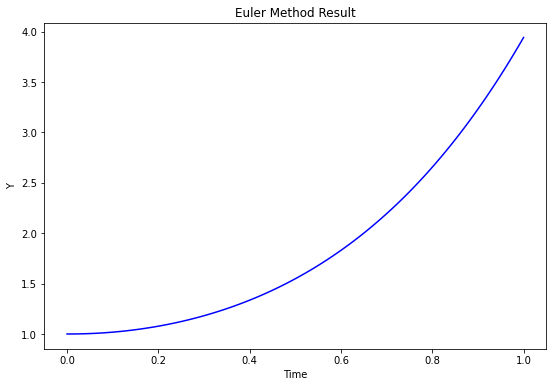

In [4]:
K = Euler(T,func,y0)


fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T, K, 'b-', markersize=2)
#plt.plot(T, (1+T**2)**2, 'r-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('Euler Method Result')
plt.show()



In [5]:
#Runge-Kutta

def Runge_Kutta_3(times,f,y0):
    no_of_times = times.size                                                
    Y = np.zeros((no_of_times))             
                                                      
    Y[0] = y0  
    for i in range(no_of_times-1):  
        h = times[i+1] - times[i]  
        delta1 = f(times[i],Y[i]) * h 
        delta2 = f(times[i]+1/2*h,Y[i]+1/2*delta1) * h  
        delta3 = f(times[i]+h,Y[i]-delta1+2*delta2) * h  
        Y[i+1] = Y[i] + 1/6*(delta1+4*delta2+delta3) 
    return Y


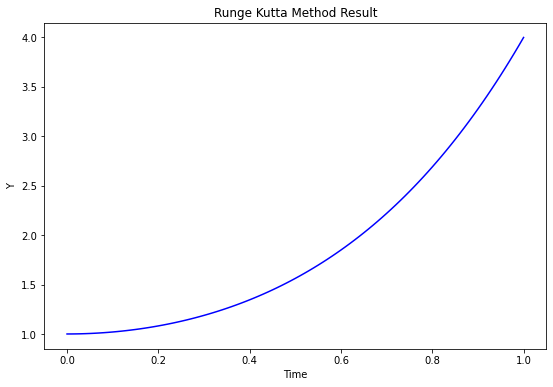

In [6]:
K1 = Runge_Kutta_3(T,func,y0)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T, K1, 'b-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('Runge Kutta Method Result')
plt.show()


# IDCp-FE

In [7]:
#integral deferred correction


def IDC(a,b,N,p,y0):
    #(a,b)-endpoints, N-number of steps, p-order of method, y0-I.C

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/M)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,M+1))  #times
    Y = np.zeros((J,M+1))  #approx solution
    Y1 = np.zeros((J,M+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(M):   #prediction
            T[j,m] = (j*M + m)*h
            T[j,m+1] = (j*M + m+1)*h
            Y[j,m+1] = Y[j,m] + h*(4*T[j,m]*Y[j,m]**(0.5)) #Eulers forward method  
            
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                g = 0
                for k in range(M+1):
                    g = g + S[m,k]*(4*T[j,k]*Y[j,k]**(0.5))
   
                Y1[j,m+1] = Y1[j,m] + h*((4*T[j,m]*Y[j,m]**0.5)-(4*T[j,m]*Y1[j,m]**0.5)) + h*g  #solve error equation with forward Euler
            Y[j,:] = Y1[j,:]
    
        sol_list[j*M+1:j*M+M+1] = Y1[j,1:M+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,M]
            
    return sol_list



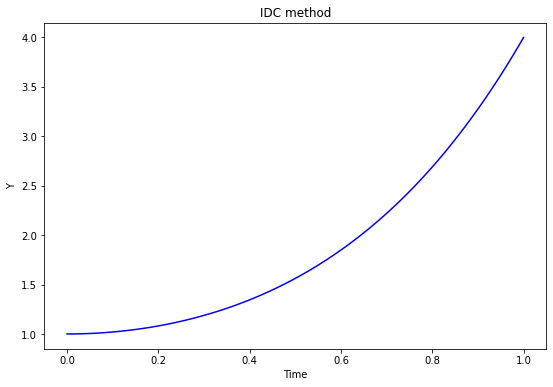

In [8]:

T1 = np.linspace(0,1,101)
K2 = IDC(0,1,100,3,1)

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(T1, K2, 'b-', markersize=2)
plt.xlabel('Time')
plt.ylabel(r'Y')
plt.title('IDC method')
plt.show()

## Order of convergence calculations

In [9]:
def func_sol(T):  #exact solution
    
    y_t = (1+T**2)**2
    
    return np.array([y_t])

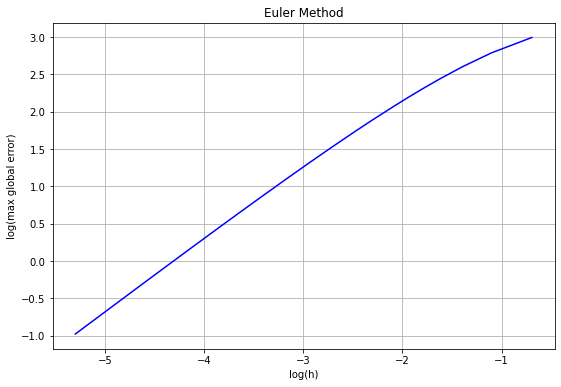

In [10]:
#Finding order of convergence for Euler method

errorlist = []
stepsizelist = []

for i in range(3,202):    #timestep sizes from h=1 t h=0.01
    T = np.linspace(0, 2, i)
    K = Euler(T,func,y0)
    stepsizelist.append(1/(i-1))
    m = [abs(K[j] - func_sol(T[j])) for j in range(i)]
    errorlist.append(max(m))
    
logerrorlist = [np.log(i) for i in errorlist]
logstepsizelist = [np.log(i) for i in stepsizelist]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist, logerrorlist, 'b-', markersize=2)
plt.grid()
#plt.plot(stepsizelist, errorlist, 'r-', markersize=2)
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Euler Method')
plt.show()

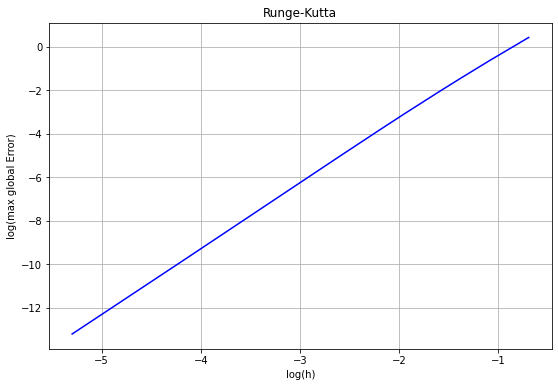

In [11]:
#Finding order of convergence for Runge-Kutta method

errorlist1 = []
stepsizelist1 = []

for i in range(3,202):   
    T = np.linspace(0, 2, i)
    K1 = Runge_Kutta_3(T,func,y0)
    stepsizelist1.append(1/(i-1))
    m = [abs(K1[j] - func_sol(T[j])) for j in range(i)]
    errorlist1.append(max(m))
    
logerrorlist1 = [np.log(i) for i in errorlist1]
logstepsizelist1 = [np.log(i) for i in stepsizelist1]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist1, logerrorlist1, 'b-', markersize=2)
#plt.plot(stepsizelist, errorlist, 'r-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global Error)')
plt.title('Runge-Kutta')
plt.show()



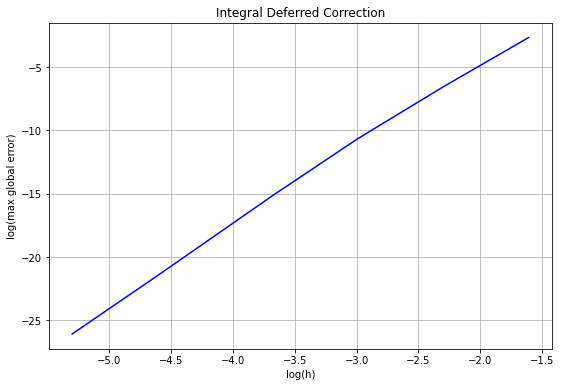

In [12]:
errorlistt = []
stepsizelistt = []

for i in [6,11,21,41,101,201]:   
    T = np.linspace(0, 2, i)
    K2 = IDC(0,2,i-1,6,1)
    stepsizelistt.append(1/(i-1))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlistt.append(max(m))
    
logerrorlist2 = [np.log(i) for i in errorlistt]
logstepsizelist2 = [np.log(i) for i in stepsizelistt]

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2)
plt.grid()
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Integral Deferred Correction')
plt.show()

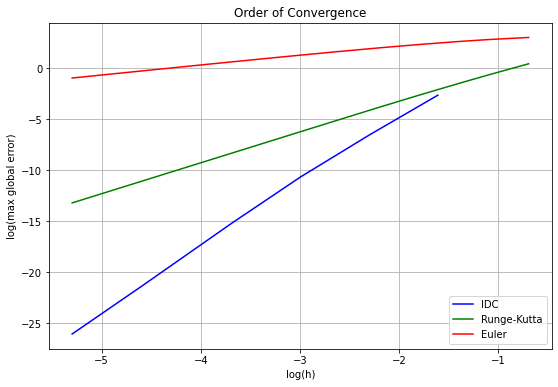

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(logstepsizelist2, logerrorlist2, 'b-', markersize=2, label = 'IDC')
plt.plot(logstepsizelist1, logerrorlist1, 'g-', markersize=2, label = 'Runge-Kutta')
plt.plot(logstepsizelist, logerrorlist, 'r-', markersize=2, label = 'Euler')
plt.grid()
plt.legend(loc="lower right") 
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Order of Convergence')
plt.show()

In [14]:
errorlist2 = []
stepsizelist2 = []

for i in [5,9,21,41,101,201]:   
    T = np.linspace(0, 2, i)
    K2 = IDC(0,2,i-1,2,1)
    stepsizelist2.append(np.log(1/(i-1)))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlist2.append(np.log(max(m)))
    
errorlist3 = []
stepsizelist3 = []

for i in [7,9,21,41,101,201]:   
    T = np.linspace(0, 2, i)
    K2 = IDC(0,2,i-1,3,1)
    stepsizelist3.append(np.log(1/(i-1)))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlist3.append(np.log(max(m)))
    
errorlist4 = []
stepsizelist4 = []
    
for i in [10,16,22,46,103,202]:   
    T = np.linspace(0, 2, i)
    K2 = IDC(0,2,i-1,4,1)
    stepsizelist4.append(np.log(1/(i-1)))
    m = [abs(K2[j] - func_sol(T[j])) for j in range(i)]
    errorlist4.append(np.log(max(m)))
    


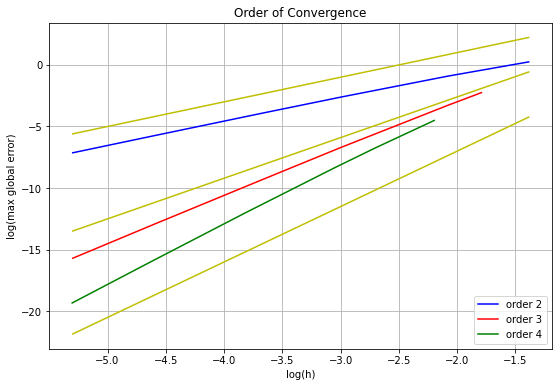

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(stepsizelist2, errorlist2, 'b-', markersize=2, label = 'order 2')
plt.plot(stepsizelist3, errorlist3, 'r-', markersize=2, label = 'order 3')
plt.plot(stepsizelist4, errorlist4, 'g-', markersize=2, label = 'order 4')
plt.plot(stepsizelist2, 2*np.array(stepsizelist2)+5, 'y-', markersize=2)
plt.plot(stepsizelist2, 3.3*np.array(stepsizelist2)+4, 'y-', markersize=2)
plt.plot(stepsizelist2, 4.5*np.array(stepsizelist2)+2, 'y-', markersize=2)
plt.grid()
plt.legend(loc="lower right") 
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Order of Convergence')
plt.show()

# RIDC(p,k)-FE

In [16]:
#revised integral deferred correction
F = lambda t,y : 4*t*y**(0.5)

def RIDC(a,b,N,p,K,y0,F):#Euler
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(K):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Eulers forward method  
            
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                a = 0
                g = sum([a + S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                a = 0
                g = sum([a + S[M-1,k]*F(T[j,m-M+k],Y[j,m-M+k]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,K]
            
    return sol_list



In [17]:
#revised integral deferred correction with Adam bashford prediction


def RIDC_adam1(a,b,N,p,K,y0,F):#Adam Bashforth
    #(a,b)-endpoints, N-number of steps, p-order of method, K- No. intervals,  y0-I.C, F-function

    h = (b-a)/N  #stepsize
    M = p-1  
    J = int(N/K)
    sol_list = np.zeros(N+1)
    sol_list[0] = y0
    T = np.zeros((J,K+1))
    times = np.linspace(a,b,N+1)
    for j in range(J):
        T[j,0:K+1] = times[j*K:j*K+K+1] #times
    Y = np.zeros((J,K+1))  #approx solution
    Y1 = np.zeros((J,K+1))   #corrected solution
    Y[0,0]= y0            #inital value
    S = np.zeros((M,M+1))  #integration matrix
    
    for m in range(M):   # calculating integration matrix
        for i in range(M+1):
            x = np.arange(M+1)  # Construct a polynomial
            y = np.zeros(M+1)   # which equals 1 at i, 0 at other points
            y[i] = 1
            p = lagrange(x, y)  # constructs polynomial
            para = np.poly1d.integ(p)  
            S[m,i] = para(m+1) - para(m)  #finds definite integral of polynomial and adds to integral matrix
            
    for j in range(J):
        for m in range(2):   #prediction
            Y[j,m+1] = Y[j,m] + h*F(T[j,m],Y[j,m]) #Adam Bashforth 2    
        for m in range(K-2):
            Y[j,m+2] = Y[j,m+1] + h*(3/2*F(T[j,m+1],Y[j,m+1]) - 1/2*F(T[j,m],Y[j,m]))
            
        
        for l in range(M+1):   #correction
            Y1[j,0] = Y[j,0]
            
            for m in range(M):  
                a = 0
                g = sum([a + S[m,k]*F(T[j,k],Y[j,k]) for k in range(M+1)])

                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g #solve error equation with forward Euler
            
            for m in range(M,K):
                a = 0
                g = sum([a + S[M-1,k]*F(T[j,m-M+k],Y[j,m-M+k]) for k in range(M+1)])
                
                Y1[j,m+1] = Y1[j,m] + h*(F(T[j,m],Y[j,m])-F(T[j,m],Y1[j,m])) + h*g  #solve error equation with forward Euler
                    
            Y[j,:] = Y1[j,:]
    
        sol_list[j*K+1:j*K+K+1] = Y1[j,1:K+1]
        if j!=J-1:           #set initial value for next iteration
            Y[j+1,0] = Y1[j,K]
            
    return sol_list



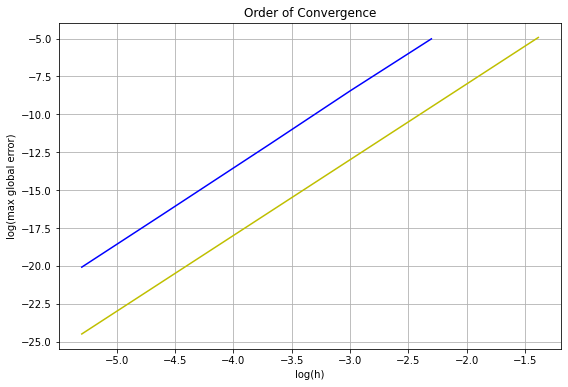

In [18]:
errorlist5 = []
stepsizelist5 = []

for i in [11,21,41,101,201]:   
    T = np.linspace(0, 2, i)
    K5 = RIDC_adam1(0,2,i-1,6,5,1,F)
    stepsizelist5.append(np.log(1/(i-1)))
    m = [abs(K5[j] - func_sol(T[j])) for j in range(i)]
    errorlist5.append(np.log(max(m)))
    

fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(stepsizelist5, errorlist5, 'b-', markersize=2)
plt.plot(stepsizelist2, 5*np.array(stepsizelist2)+2, 'y-', markersize=2)
plt.grid()
#plt.legend(loc="lower right") 
plt.xlabel('log(h)')
plt.ylabel(r'log(max global error)')
plt.title('Order of Convergence')
plt.show()